In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import dask.dataframe as dd
import statsmodels.api as sm
from pathlib import Path
import yaml

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
from IPython.display import Latex

In [41]:
df = pd.read_csv("/Users/peter/Public/4th year Senior/Fall Semester/ECO481        Special Topics/Final Paper/Submit.csv")
data = df.dropna(subset= ['Median Household Income','% Completed High School','% Adults with Diabetes','Age-Adjusted Death Rate',
                          '% Adults Reporting Currently Smoking','Food Environment Index'])

data['Year_2023'] = np.where(data['Year'] == 2023, 1,0)
data['Income_10k'] = (data['Median Household Income']/10000)
data = data.rename(columns={'% Adults with Diabetes': 'Diabetes Prevalence Rate',
                            '% Adults with Obesity': 'Obesity Prevalence Rate'})
data.head()

/var/folders/vs/hhhp3tjj11b7n4545rg5s7bh0000gn/T/ipykernel_45321/3113896265.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year_2023'] = np.where(data['Year'] == 2023, 1,0)
/var/folders/vs/hhhp3tjj11b7n4545rg5s7bh0000gn/T/ipykernel_45321/3113896265.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Income_10k'] = (data['Median Household Income']/10000)


,Year,State,County,Age-Adjusted Death Rate,Diabetes Prevalence Rate,% Frequent Physical Distress,% Frequent Mental Distress,% Completed High School,% Some College,% Unemployed,...,% 65 and Over,% Female,% Adults Reporting Currently Smoking,Obesity Prevalence Rate,% Physically Inactive,% Excessive Drinking,Food Environment Index,% Uninsured,Year_2023,Income_10k
0,2023.0,Alabama,NaN,500.0,13.0,11.0,16.0,87.0,62.0,3.4,...,17.6,51.4,20.0,39.0,28.0,16.0,5.3,12.0,1,5.3990
1,2023.0,Alabama,Autauga,427.0,11.0,11.0,16.0,90.0,60.0,2.8,...,16.0,51.4,18.0,37.0,26.0,17.0,6.6,11.0,1,6.6444
2,2023.0,Alabama,Baldwin,382.0,10.0,10.0,16.0,91.0,66.0,3.0,...,21.5,51.3,17.0,33.0,23.0,19.0,7.5,11.0,1,6.5658
3,2023.0,Alabama,Barbour,590.0,16.0,15.0,18.0,76.0,39.0,5.7,...,20.0,46.7,26.0,46.0,36.0,13.0,5.8,14.0,1,3.8649
4,2023.0,Alabama,Bibb,568.0,12.0,13.0,17.0,81.0,37.0,3.5,...,16.7,46.0,23.0,38.0,32.0,16.0,7.4,13.0,1,4.8454


In [42]:
x = data[['% Some College','% Less than 18 Years of Age',
          '% 65 and Over','Year_2023']]
x = sm.add_constant(x)
y = data['Obesity Prevalence Rate']

model1 = sm.OLS(y,x).fit()

slope_col1 = model1.params['% Some College']

In [43]:
x = data[['% Some College','% Unemployed','Income_10k','% Less than 18 Years of Age',
          '% 65 and Over','Year_2023']]
x = sm.add_constant(x)
y = data['Obesity Prevalence Rate']

model2 = sm.OLS(y,x).fit()

slope_col2 = model2.params['% Some College']
slope_Inc2 = model2.params['Income_10k']
slope_UR2 = model2.params['% Unemployed']

In [44]:
x = data[['% Some College','% Unemployed','Income_10k','% Physically Inactive','% Adults Reporting Currently Smoking','Food Environment Index',
          '% Excessive Drinking','% Uninsured','% Less than 18 Years of Age',
          '% 65 and Over','Year_2023']]
x = sm.add_constant(x)
y = data['Obesity Prevalence Rate']

model3 = sm.OLS(y,x).fit()
print(model3.summary())

slope_col3 = model3.params['% Some College']
slope_Inc3 = model3.params['Income_10k']
slope_UR3 = model3.params['% Unemployed']
slope_Smo3 = model3.params['% Adults Reporting Currently Smoking']
slope_fi3 = model3.params['Food Environment Index']
slope_Phyinact3 = model3.params['% Physically Inactive']
slope_Drink3 = model3.params['% Excessive Drinking']
slope_Uninsur3 = model3.params['% Uninsured']


                               OLS Regression Results                              
Dep. Variable:     Obesity Prevalence Rate   R-squared:                       0.667
Model:                                 OLS   Adj. R-squared:                  0.666
Method:                      Least Squares   F-statistic:                     1127.
Date:                     Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                             16:46:22   Log-Likelihood:                -14725.
No. Observations:                     6200   AIC:                         2.947e+04
Df Residuals:                         6188   BIC:                         2.955e+04
Df Model:                               11                                         
Covariance Type:                 nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [45]:
slope_col1 = float(slope_col1)

slope_col2 = float(slope_col2)
slope_Inc2 = float(slope_Inc2)
slope_UR2 = float(slope_UR2)

slope_col3 = float(slope_col3)
slope_Inc3 = float(slope_Inc3)
slope_UR3 = float(slope_UR3)
slope_Smo3 = float(slope_Smo3)
slope_fi3 = float(slope_fi3)
slope_Phyinact3 = float(slope_Phyinact3)
slope_Drink3 = float(slope_Drink3)
slope_Uninsur3 = float(slope_Uninsur3)

In [46]:
table2 = Stargazer([model1,model2, model3])
table2.title('Table 2: Regression analysis of Obesity Prevalence Rate')
table2.custom_columns(['Model 1', 'Model 2','Model 3'], [1,1,1])
table2.show_model_numbers(False)
table2.covariate_order(['% Some College','% Unemployed','Income_10k','% Physically Inactive','% Adults Reporting Currently Smoking','Food Environment Index',
          '% Excessive Drinking','% Uninsured','% Less than 18 Years of Age',
          '% 65 and Over','Year_2023'])
table2.rename_covariates({'% Some College': 'Post-Secondary Education Completion Rate',
                         '% Unemployed': 'Unemployment Rate',
                         'Income_10k': 'Income($10k)',
                         '% Physically Inactive': 'Physical Inactivity Rate',
                         '% Adults Reporting Currently Smoking': 'Smoking Rate',
                         '% Excessive Drinking': 'Excessive Drinking Rate',
                         '% Uninsured': 'Uninsured Rate',
                         '% Less than 18 Years of Age': 'Under 18 Years of Age',
                         "% 65 and Over": 'Above 65 Years of Age'
                         })

code2 = table2.render_html()
HTML(code2)

In [47]:
x = data[['% Some College','% Less than 18 Years of Age',
          '% 65 and Over','Year_2023']]
x = sm.add_constant(x)
y = data['% Unemployed']

model7 = sm.OLS(y,x).fit()

In [48]:
x = data[['% Some College','% Less than 18 Years of Age',
          '% 65 and Over','Year_2023']]
x = sm.add_constant(x)
y = data['Income_10k']

model8 = sm.OLS(y,x).fit()

In [49]:
x = data[['% Some College','% Less than 18 Years of Age',
          '% 65 and Over','Year_2023']]
x = sm.add_constant(x)
y = data['% Physically Inactive']

model9 = sm.OLS(y,x).fit()
print(sm.OLS(y,x).fit().summary())

                              OLS Regression Results                             
Dep. Variable:     % Physically Inactive   R-squared:                       0.595
Model:                               OLS   Adj. R-squared:                  0.595
Method:                    Least Squares   F-statistic:                     2280.
Date:                   Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                           16:46:22   Log-Likelihood:                -17058.
No. Observations:                   6200   AIC:                         3.413e+04
Df Residuals:                       6195   BIC:                         3.416e+04
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [50]:
x = data[['% Some College','% Less than 18 Years of Age',
          '% 65 and Over','Year_2023']]
x = sm.add_constant(x)
y = data['% Adults Reporting Currently Smoking']

model10 = sm.OLS(y,x).fit()

print(sm.OLS(y,x).fit().summary())

                                     OLS Regression Results                                     
Dep. Variable:     % Adults Reporting Currently Smoking   R-squared:                       0.451
Model:                                              OLS   Adj. R-squared:                  0.451
Method:                                   Least Squares   F-statistic:                     1274.
Date:                                  Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                                          16:46:22   Log-Likelihood:                -15756.
No. Observations:                                  6200   AIC:                         3.152e+04
Df Residuals:                                      6195   BIC:                         3.156e+04
Df Model:                                             4                                         
Covariance Type:                              nonrobust                                         
                              

In [51]:
x = data[['% Some College','% Less than 18 Years of Age',
          '% 65 and Over','Year_2023']]
x = sm.add_constant(x)
y = data['% Excessive Drinking']

model11 = sm.OLS(y,x).fit()
print(sm.OLS(y,x).fit().summary())

                             OLS Regression Results                             
Dep. Variable:     % Excessive Drinking   R-squared:                       0.221
Model:                              OLS   Adj. R-squared:                  0.220
Method:                   Least Squares   F-statistic:                     439.1
Date:                  Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                          16:46:22   Log-Likelihood:                -15390.
No. Observations:                  6200   AIC:                         3.079e+04
Df Residuals:                      6195   BIC:                         3.082e+04
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [52]:
x = data[['% Some College','% Less than 18 Years of Age',
          '% 65 and Over','Year_2023']]
x = sm.add_constant(x)
y = data['% Uninsured']

model12 = sm.OLS(y,x).fit()
print(sm.OLS(y,x).fit().summary())

                            OLS Regression Results                            
Dep. Variable:            % Uninsured   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     544.6
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:46:23   Log-Likelihood:                -18015.
No. Observations:                6200   AIC:                         3.604e+04
Df Residuals:                    6195   BIC:                         3.607e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [53]:
table3 =  Stargazer([model7,model8, model9, model10,model11,model12])
table3.title('Table 1: Effect of Educational Attainment on Socioeconomic Status and Health Behaviors')
table3.custom_columns(['Unemployment Rate','Income','Physical Inactivity Rate', 'Smoking Rate','Excessive Drinking Rate', 'Uninsured Rate'], [1,1,1,1,1,1])
table3.show_model_numbers(False)
table3.covariate_order(['% Some College','% Less than 18 Years of Age',
          '% 65 and Over','Year_2023'])

table3.rename_covariates({'% Some College': 'Post-Secondary Education Completion Rate',
                         
                         '% Less than 18 Years of Age': 'Under 18 Years of Age',
                         "% 65 and Over": 'Above 65 Years of Age'
                         })

code3 = table3.render_html()
HTML(code3)

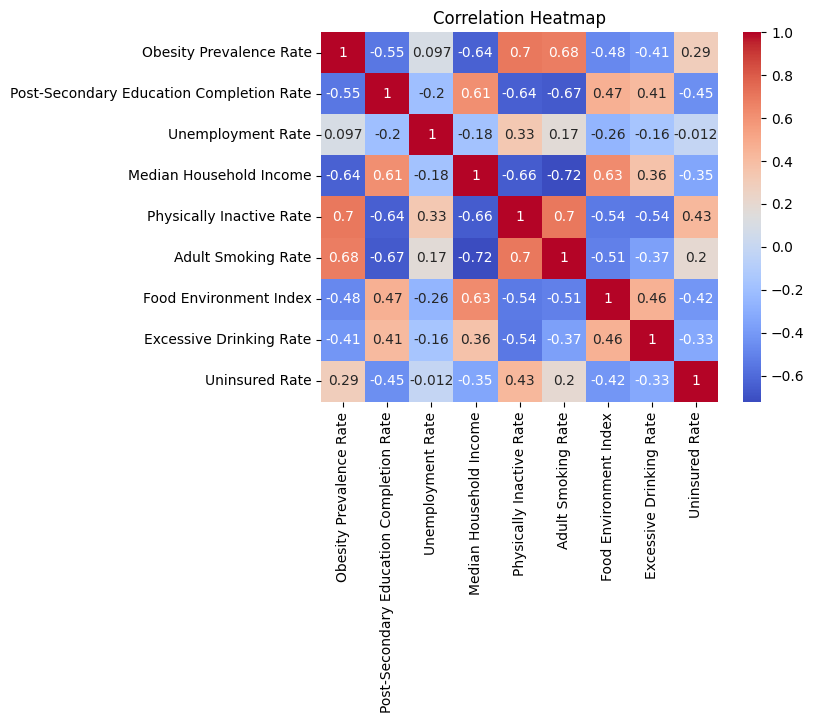

In [54]:
# Correlation Heatmap
import seaborn as sns
data_heatmap = data[['Obesity Prevalence Rate','% Some College','% Unemployed','Income_10k','% Physically Inactive','% Adults Reporting Currently Smoking','Food Environment Index',
          '% Excessive Drinking','% Uninsured']]

corr_matrix = data_heatmap.corr()
sns.heatmap(corr_matrix, annot=True, cmap ='coolwarm', 
            xticklabels = ['Obesity Prevalence Rate','Post-Secondary Education Completion Rate','Unemployment Rate', 'Median Household Income', 'Physically Inactive Rate',
                           'Adult Smoking Rate', 'Food Environment Index',
                           'Excessive Drinking Rate','Uninsured Rate'],
            yticklabels = ['Obesity Prevalence Rate','Post-Secondary Education Completion Rate','Unemployment Rate', 'Median Household Income', 'Physically Inactive Rate',
                           'Adult Smoking Rate', 'Food Environment Index',
                           'Excessive Drinking Rate','Uninsured Rate'])

plt.title("Correlation Heatmap")
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()


In [55]:
results_to_output = {
    'slope_col1': slope_col1,

    'slope_HS2': slope_col2,
    'slope_Inc2': slope_Inc2,
    'slope_UR2': slope_UR2,

    'slope_HS3': slope_col3,
    'slope_Inc3': slope_Inc3,
    'slope_UR3': slope_UR3,
    'slope_Smo3': slope_Smo3,
    'slope_fi3': slope_fi3,
    'slope_Phyinact3': slope_Phyinact3,
    'slope_Drink3': slope_Drink3,
    'slope_Uninsur3': slope_Uninsur3,

}
print(results_to_output)

{'slope_col1': -0.20759415152506824, 'slope_HS2': -0.0797857571831703, 'slope_Inc2': -1.6898182596711495, 'slope_UR2': 0.014611491810519711, 'slope_HS3': 0.019070951959765218, 'slope_Inc3': -0.6351621373980797, 'slope_UR3': 0.00097538286738761, 'slope_Smo3': 0.18752379559744392, 'slope_fi3': 0.10714167222996882, 'slope_Phyinact3': 0.47791931803584664, 'slope_Drink3': 0.04535520585566522, 'slope_Uninsur3': -0.0674450298050756}


In [56]:
# Create results directory if it doesn't exist
Path('results').mkdir(parents=True, exist_ok=True)

# Output results to YAML
with open('results/Obesity_education.yaml', 'w') as f:
    yaml.dump(results_to_output, f)